In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
import math

In [2]:
data = pd.read_csv('./Road_Weather_Information_Stations.csv')

In [3]:
# Will display First 5 and Last 5 rows of data
data

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),02/25/2020 02:14:00 AM,3818250,41.89,41.89
1,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:18:00 AM,3753392,44.51,41.58
2,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:19:00 AM,3753393,44.48,41.59
3,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:20:00 AM,3753394,44.48,41.61
4,NE45StViaduct,POINT (-122.301929 47.66127),02/24/2020 02:06:00 AM,3822795,43.38,42.98
...,...,...,...,...,...,...
32069,35thAveSW_SWMyrtleSt,POINT (-122.37658 47.53918),02/24/2020 01:05:00 AM,2671347,43.52,43.52
32070,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 01:01:00 AM,3753315,44.92,41.43
32071,35thAveSW_SWMyrtleSt,POINT (-122.37658 47.53918),02/24/2020 01:06:00 AM,2671348,43.51,43.51
32072,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 01:02:00 AM,3753316,44.92,41.40


In [4]:
#Looks at first 5 rows of data
data.head()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),02/25/2020 02:14:00 AM,3818250,41.89,41.89
1,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:18:00 AM,3753392,44.51,41.58
2,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:19:00 AM,3753393,44.48,41.59
3,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 02:20:00 AM,3753394,44.48,41.61
4,NE45StViaduct,POINT (-122.301929 47.66127),02/24/2020 02:06:00 AM,3822795,43.38,42.98


In [5]:
#looks at last 5 rows of data
data.tail()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
32069,35thAveSW_SWMyrtleSt,POINT (-122.37658 47.53918),02/24/2020 01:05:00 AM,2671347,43.52,43.52
32070,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 01:01:00 AM,3753315,44.92,41.43
32071,35thAveSW_SWMyrtleSt,POINT (-122.37658 47.53918),02/24/2020 01:06:00 AM,2671348,43.51,43.51
32072,AuroraBridge,POINT (-122.347278 47.643174),02/24/2020 01:02:00 AM,3753316,44.92,41.40
32073,35thAveSW_SWMyrtleSt,POINT (-122.37658 47.53918),02/24/2020 01:07:00 AM,2671349,43.50,43.50


In [6]:
#descriptive statistics for each of your variables ignores strs
data.describe()

,RecordId,RoadSurfaceTemperature,AirTemperature
count,3.207400e+04,32074.000000,32074.000000
mean,3.130538e+06,45.046232,44.238897
std,1.027365e+06,5.637982,4.303835
min,6.812330e+05,33.020000,31.690000
25%,2.776962e+06,41.370000,41.530000
50%,3.732360e+06,44.290000,43.930000
75%,3.785424e+06,49.130000,47.230000
max,3.825349e+06,62.500000,62.500000


In [7]:
#allows for grouping data by categories within whole data set 
#function at end denotes unit operation
#operation examples above
#you can pass a column name like .AirTemperature at the end to get only stats for that column
descrm=data.groupby(by='StationName').mean() #gives mean of all columns
descr=data.groupby(by='StationName').describe() # gives descriptive stats for all columns
descrair=descr['AirTemperature'] #isolates descriptive starics for the Air Temperature column
descr['AirTemperature']['mean'] # isolates the mean data of AirTemperature

StationName
35thAveSW_SWMyrtleSt         43.961937
AlbroPlaceAirportWay         39.133304
AuroraBridge                 43.761917
HarborAveUpperNorthBridge    43.802940
MagnoliaBridge               44.245566
NE45StViaduct                44.000256
RooseveltWay_NE80thSt        46.278540
SpokaneSwingBridge           48.737976
Name: mean, dtype: float64

In [8]:
descrm

,RecordId,RoadSurfaceTemperature,AirTemperature
StationName,,,
35thAveSW_SWMyrtleSt,2.672621e+06,43.961937,43.961937
AlbroPlaceAirportWay,6.825746e+05,36.565986,39.133304
AuroraBridge,3.754594e+06,46.556574,43.761917
HarborAveUpperNorthBridge,2.778312e+06,46.162060,43.802940
MagnoliaBridge,3.784093e+06,48.154036,44.245566
NE45StViaduct,3.824008e+06,46.883708,44.000256
RooseveltWay_NE80thSt,3.818020e+06,46.278540,46.278540
SpokaneSwingBridge,3.731029e+06,45.786144,48.737976


In [9]:
descr

RecordId                                       \
                             count          mean         std        min   
StationName                                                               
35thAveSW_SWMyrtleSt        4017.0  2.672621e+06  773.201385  2671282.0   
AlbroPlaceAirportWay        4001.0  6.825746e+05  773.723601   681233.0   
AuroraBridge                4002.0  3.754594e+06  774.410178  3753254.0   
HarborAveUpperNorthBridge   4030.0  2.778312e+06  778.524486  2776962.0   
MagnoliaBridge              4019.0  3.784093e+06  773.698564  3782754.0   
NE45StViaduct               4016.0  3.824008e+06  773.133271  3822669.0   
RooseveltWay_NE80thSt       3987.0  3.818020e+06  772.536573  3816676.0   
SpokaneSwingBridge          4002.0  3.731029e+06  774.261602  3729691.0   

                                                                         \
                                  25%        50%         75%        max   
StationName                                                               
35thAveSW_SWMyrtleSt       2671951.00  2672623.0  2673290.00  2673962.0   
AlbroPlaceAirportWay        681900.00   682580.0   683243.00   683913.0   
AuroraBridge               3753921.25  3754600.5  3755264.00  3755934.0   
HarborAveUpperNorthBridge  2777635.25  2778317.5  2778988.75  2779641.0   
MagnoliaBridge             3783422.50  3784092.0  3784762.00  3785436.0   
NE45StViaduct              3823338.00  3824007.5  3824677.00  3825349.0   
RooseveltWay_NE80thSt      3817351.50  3818025.0  3818689.50  3819356.0   
SpokaneSwingBridge         3730358.25  3731025.5  3731701.00  3732371.0   

                          RoadSurfaceTemperature             ...           \
                                           count       mean  ...      75%   
StationName                                                  ...            
35thAveSW_SWMyrtleSt                      4017.0  43.961937  ...  45.0400   
AlbroPlaceAirportWay                      4001.0  36.565986  ...  38.5200   
AuroraBridge                              4002.0  46.556574  ...  49.4800   
HarborAveUpperNorthBridge                 4030.0  46.162060  ...  52.2100   
MagnoliaBridge                            4019.0  48.154036  ...  52.0350   
NE45StViaduct                             4016.0  46.883708  ...  51.7425   
RooseveltWay_NE80thSt                     3987.0  46.278540  ...  50.6900   
SpokaneSwingBridge                        4002.0  45.786144  ...  49.6700   

                                 AirTemperature                              \
                             max          count       mean       std    min   
StationName                                                                   
35thAveSW_SWMyrtleSt       45.83         4017.0  43.961937  1.162774  42.10   
AlbroPlaceAirportWay       39.96         4001.0  39.133304  3.745452  31.69   
AuroraBridge               51.40         4002.0  43.761917  3.545939  37.17   
HarborAveUpperNorthBridge  57.76         4030.0  43.802940  3.482722  37.51   
MagnoliaBridge             62.09         4019.0  44.245566  3.180253  38.68   
NE45StViaduct              57.43         4016.0  44.000256  3.434198  37.15   
RooseveltWay_NE80thSt      62.50         3987.0  46.278540  5.330483  39.23   
SpokaneSwingBridge         53.53         4002.0  48.737976  2.646282  43.42   

                                                        
                             25%     50%    75%    max  
StationName                                             
35thAveSW_SWMyrtleSt       42.90  43.840  45.04  45.83  
AlbroPlaceAirportWay       35.82  39.590  41.85  46.04  
AuroraBridge               41.14  43.520  46.68  50.86  
HarborAveUpperNorthBridge  41.23  44.000  46.59  50.77  
MagnoliaBridge             42.07  43.630  47.24  52.25  
NE45StViaduct              42.05  43.440  47.20  50.39  
RooseveltWay_NE80thSt      41.36  45.160  50.69  62.50  
SpokaneSwingBridge         47.14  48.695  50.63  53.82  

[8 rows x 24 columns]

In [10]:
descrair

,count,mean,std,min,25%,50%,75%,max
StationName,,,,,,,,
35thAveSW_SWMyrtleSt,4017.0,43.961937,1.162774,42.10,42.90,43.840,45.04,45.83
AlbroPlaceAirportWay,4001.0,39.133304,3.745452,31.69,35.82,39.590,41.85,46.04
AuroraBridge,4002.0,43.761917,3.545939,37.17,41.14,43.520,46.68,50.86
HarborAveUpperNorthBridge,4030.0,43.802940,3.482722,37.51,41.23,44.000,46.59,50.77
MagnoliaBridge,4019.0,44.245566,3.180253,38.68,42.07,43.630,47.24,52.25
NE45StViaduct,4016.0,44.000256,3.434198,37.15,42.05,43.440,47.20,50.39
RooseveltWay_NE80thSt,3987.0,46.278540,5.330483,39.23,41.36,45.160,50.69,62.50
SpokaneSwingBridge,4002.0,48.737976,2.646282,43.42,47.14,48.695,50.63,53.82


In [11]:
#data sorting sort by datetime
data= data.sort_values(by='DateTime')

In [12]:
# access to data for column of data time here it exists as a string
print(data['DateTime'])
type(data['DateTime'][1])

15318    02/24/2020 01:00:00 AM
26927    02/24/2020 01:00:00 AM
26942    02/24/2020 01:00:00 AM
12425    02/24/2020 01:00:00 AM
32032    02/24/2020 01:00:00 AM
                  ...          
28413    02/25/2020 12:59:00 PM
29021    02/25/2020 12:59:00 PM
28242    02/25/2020 12:59:00 PM
27176    02/25/2020 12:59:00 PM
28344    02/25/2020 12:59:00 PM
Name: DateTime, Length: 32074, dtype: object


str

In [13]:
#take data in this column and transform from string into oject Timestamp
data['DateTime']=pd.to_datetime(data['DateTime'])
data= data.sort_values(by='DateTime')
print(data['DateTime'])                                   #print transformed data
type(data['DateTime'][1])                                 #print data type

23801   2020-02-24 00:00:00
23783   2020-02-24 00:00:00
23814   2020-02-24 00:00:00
22456   2020-02-24 00:00:00
22457   2020-02-24 00:00:00
                ...        
12282   2020-02-25 20:40:00
12369   2020-02-25 20:40:00
14662   2020-02-25 20:40:00
11383   2020-02-25 20:41:00
3652    2020-02-25 20:42:00
Name: DateTime, Length: 32074, dtype: datetime64[ns]


pandas._libs.tslibs.timestamps.Timestamp

In [14]:
#pandas defines column names as legitimate variables ie 'StationName' 
#unique takes any array and detirmines all unique values
data.StationName.unique()

array(['MagnoliaBridge', 'NE45StViaduct', 'SpokaneSwingBridge',
       'AlbroPlaceAirportWay', '35thAveSW_SWMyrtleSt',
       'HarborAveUpperNorthBridge', 'RooseveltWay_NE80thSt',
       'AuroraBridge'], dtype=object)

In [15]:
print(data.StationName)

23801           MagnoliaBridge
23783            NE45StViaduct
23814       SpokaneSwingBridge
22456     AlbroPlaceAirportWay
22457     35thAveSW_SWMyrtleSt
                 ...          
12282            NE45StViaduct
12369    RooseveltWay_NE80thSt
14662     AlbroPlaceAirportWay
11383           MagnoliaBridge
3652            MagnoliaBridge
Name: StationName, Length: 32074, dtype: object


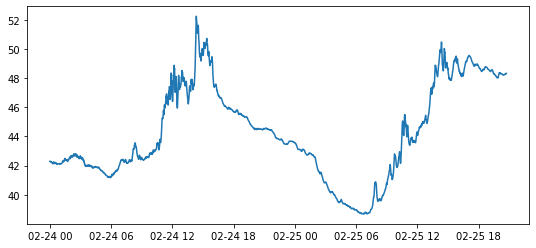

In [16]:
# Column StationName has a common string here named 'Magnolia bridge'
# we are telling python to only look at rows where the the station name is 'Magnolia bridge'
#we then specify that with this "filtered data" that we want to look at data from other columns/variables

fig, ax = plt.subplots(figsize=(9,4))
# x = data[data['StationName']].Datetime # one way to call data is with brackets
x = data[data.StationName =='MagnoliaBridge'].DateTime #makes use of the column variable
y =data[data.StationName == 'MagnoliaBridge'].AirTemperature

ax.plot(x,y)

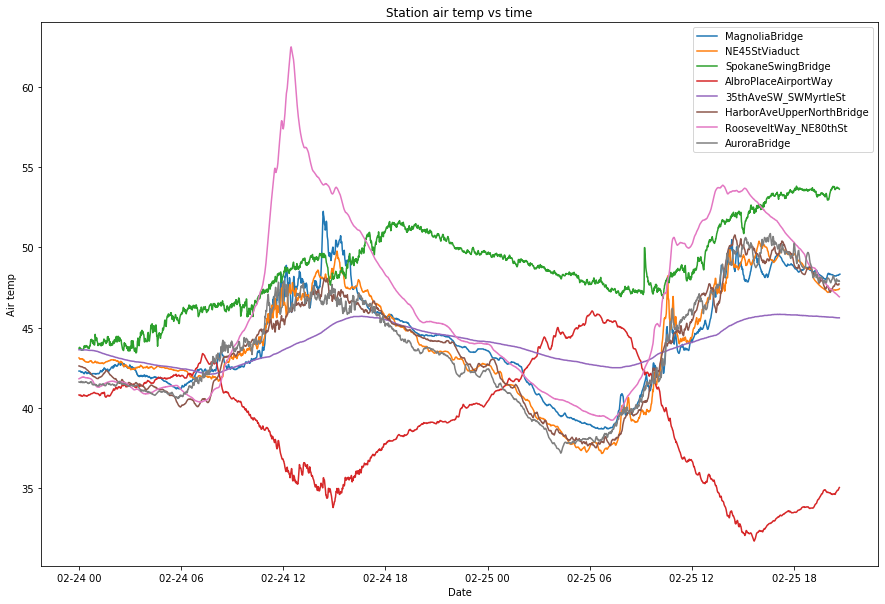

In [17]:
# We're going to use a for loop here to insert series for all 'StationNames
fig, ax = plt.subplots(figsize=(15,10))

for station in data.StationName.unique():
    x = data[data.StationName == station].DateTime 
    y =data[data.StationName == station].AirTemperature
    ax.plot(x,y,label=station)
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Air temp")
ax.title.set_text('Station air temp vs time')


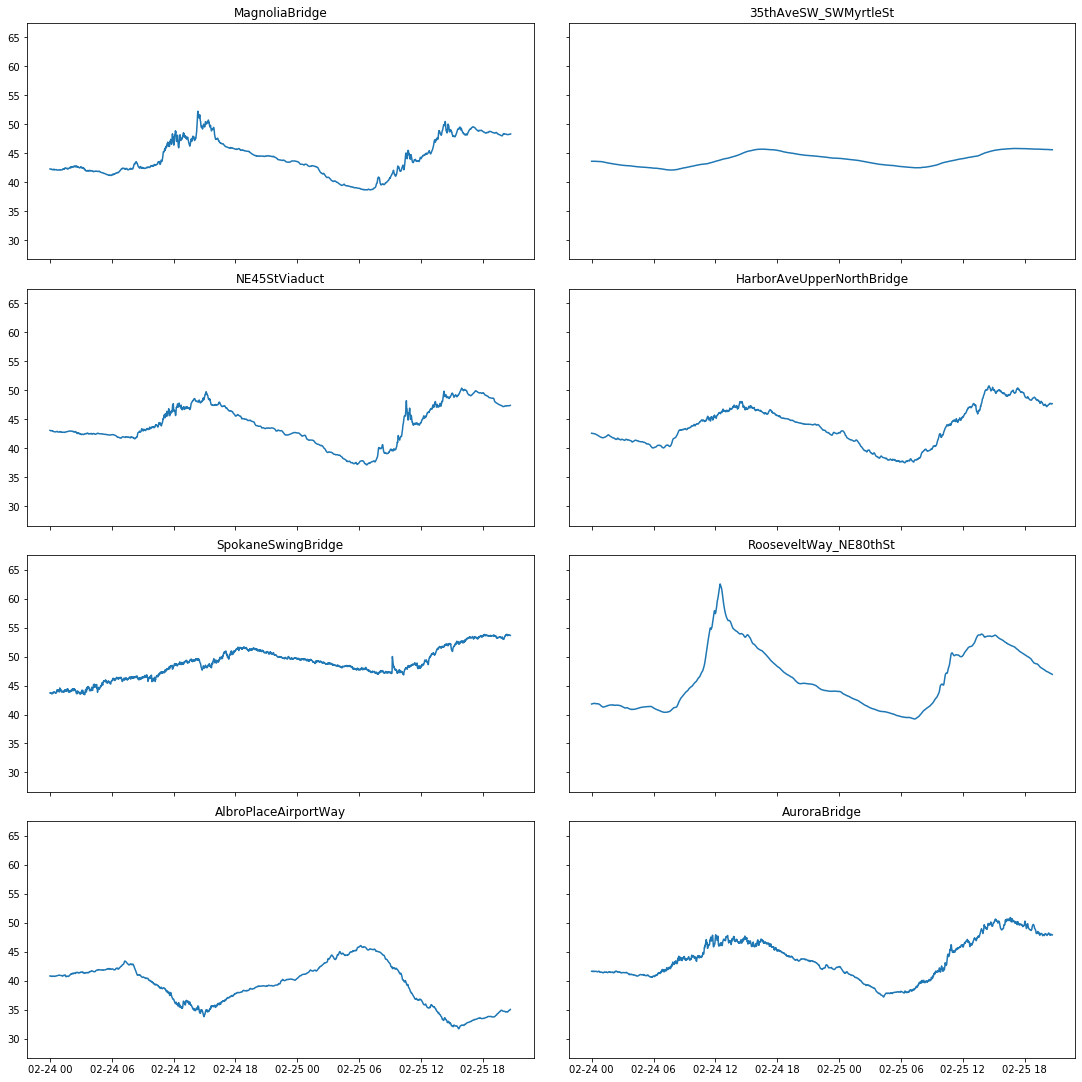

In [18]:
# We're going to make a grid of Plots for each station instatead of having everything on one graph

#we want the grid to have enough graphs to fit all Station names

jrange=2                                                    # this variable will set number of columns we restrict this value
irange=math.ceil(len(data.StationName.unique())/jrange)     # this variable will set number of rows dynamicly by len(str)


#we need to set limits on the y range so all charts appear at same scale

yfluff = 5                                                  #fluff factor makes it so data doesnt sit right on axis
ymin = data.AirTemperature.min()-yfluff
ymax = data.AirTemperature.max()+yfluff

fig, ax = plt.subplots(irange , jrange, sharex='col', sharey='row',figsize=(15,15))

            #sharex and sharey allow for charts 
            #to share the same axis so axis
            #dont clutter up the interspace
    
# we need to define variables for our for loop to iterate through while inserting our plots           
i=0
j=0

for station in data.StationName.unique():
    x = data[data.StationName == station].DateTime 
    y =data[data.StationName == station].AirTemperature
    
    # we have to tell python what char in the grid is being created hence the ax[i,j] notation
    ax[i,j].plot(x,y)
    ax[i,j].title.set_text(station)
    ax[i,j].set_ylim([ymin, ymax])
    
    #limited by the for loop we have to cleverly iterate i and j by using incrementing function
    i=i+1
    if i==irange:
        j=j+1
        i=0
        
plt.tight_layout(pad=0.6, w_pad=3, h_pad=1.0) #allows for thightly fiting charts without gross overlapping